<a href="https://colab.research.google.com/github/dareoyeleke/python_scripting/blob/main/Pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install datasets
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load data for use
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Little bit of data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
# To assign a name to the index
df.index.name # here we see the index has no identifier
df.index.name = "Job Index"
df.index.name # now when we call the DataFrame "df" it has a name for the index column as "Job Index"

In [ ]:
'''
  Some more indexing methods we can apply to our DataFrame include reset_index, which helps to add an index to a series or filtered results that show only certain values from the entire DataFrame therefore
showing only the index values of the filtered data
'''
df_data_analyst = df[df['job_title_short'] == 'Data Analyst']

df_data_analyst # these values print out an index, but only the index values associated with the original index, to actually create a new index from 0-max number, we can use the reset index to do that

df_data_analyst.reset_index(inplace=True)

df_data_analyst
#After reseting the index we see how values from 0-max number are assigned even despite the original "Job Index" being available, we also used the inplace=True to make sure it doesn't replace the original index

In [ ]:
# Since we changed the index by resseting it, we can revert to the previous index by setting the index, this also allows setting the index to any column, in this case, we'll use Job Index, since it's the original
df_data_analyst.set_index('Job Index', inplace=True)
df_data_analyst # we can now see the Job Index column has been set to the original

In [ ]:
# We have a lot of NaN values in our DataFramee, and to clean the data to focus on only complete values, we can drop NaN values from our DataFrame

# while we can use .iloc method, it strictly uses indexing to call certain ranges of rows and colums, df.iloc[0:10]

df.loc[0:, 'salary_rate':'salary_hour_avg'].dropna(subset='salary_rate')
# .loc[] on the other hand allows filtering with column names, conditional filters, booleans e.t.c, the .dropna(subset="salary_rate") allows to drop NaN values for salary_rate column

In [ ]:
import pandas as pd

# Here we will be filling in Nan values for yearly and hourly salaries with median as well as removing duplicate inputs of data in the dataframe. First we calculate the median values for the hourly and yearly salary

df_filled = df.copy() # to create a copy of the original dataframe to ensure original is not tampered with

median_yearly = df_filled['salary_year_avg'].median()

median_hourly = df_filled['salary_hour_avg'].median()



df_filled['salary_year_avg'].fillna(median_yearly) # to substitute the NaN values in salary_year_avg column with the median value

df_filled['salary_hour_avg'].fillna(median_hourly) # to repeat the process for hourly NaN values

# However both columns will not have median values filled in until replaced with the object carrying the filled values like below
df_filled['salary_year_avg'] = df_filled['salary_year_avg'].fillna(median_yearly)

df_filled['salary_hour_avg'] = df_filled['salary_hour_avg'].fillna(median_hourly)

df_filled # now we call the copy DataFrame and can see the NaN values have been filled
df_filled_salary_stats = df_filled['salary_year_avg'].describe() # shows us that we still have other values including the minimum and maximum values that were not all replaced by the median values
df_filled_salary_stats = pd.DataFrame(df_filled_salary_stats)
df_filled_salary_stats

In [ ]:
# Now to eliminate the duplicate values in the DataFrame. First we create another copy to make it easier to backtrack in case of any errors
df_dist = df_filled.copy()

df_dist.drop_duplicates() # we still have store the results in the initial object
df_dist = df_dist.drop_duplicates()

# to view the difference before and after dropping the duplicates
print("The number of rows before dropping duplicates were", len(df_filled))
print("The number of rows after dropping duplicates are now", len(df_dist))
print("The difference in number before and after dropping are", len(df_filled) - len(df_dist)) # the results printed below show the numbers of rows, before, after and the difference of row numbers with .drop_duplicates()

In [ ]:
# However we will be going even deeper on dropping duplicates, using the job_title and company name to remove any duplicates, first we create another duplicate in case of errors
df_dist2 = df_dist.copy()
df_dist2 = df_dist2.drop_duplicates(subset=['job_title', 'company_name'])
# here we use a list passed as a subset in the drop_duplicates() method to get rid of duplicates in both columnms that may contain unique values generally applicable to the whole DataFrame

print("The first set of unique rows after dropping general duplicates were", len(df_dist))
print("After filtering for extra duplicates zoning down on job title and company name the numbers are", len(df_dist2))
print("The difference in rows after removing the first and second sets of duplicates are", len(df_dist) - len(df_dist2)) # the numbers before and after adding new columns to filter with and the difference is below



In [ ]:
'''
  DataFrame managament. Here we will be using .sample(). The .sample() method is effective in getting a represetative portion of a DataFrame,
which it does more effectively than the .head() and .tail() methods which print out a default first and last 5 rows of data. The .sample() returns random rows of data from a dataset
with one row being the default, and a specified number of fraction of the total as an argument
'''
df.sample() # returns only one random row
df.sample(10, random_state=42) # returns 10 random rows everytime it runs, to assign the sample, we can use inside the argument, "random_state" and assign it to a variable


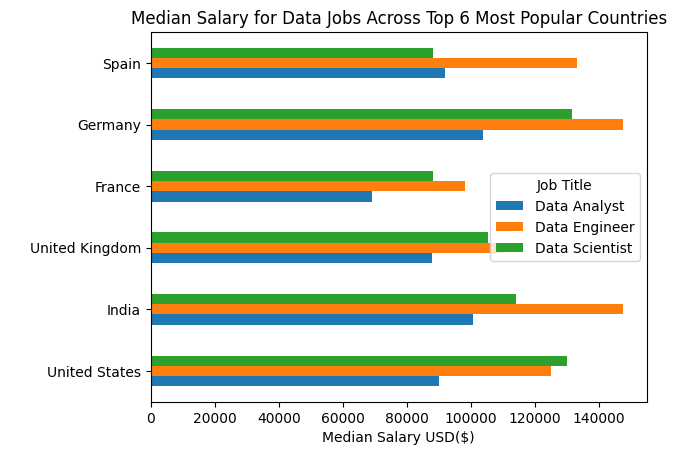

In [10]:
'''
  Here we will be creating pivot tables to view the median salary by job title and Country for the 6 countries with the highest amounts of job postings
using the index and aggfunc arguments in the .pivot_table() method, and then putting it in horizontal bar chart to better help visualize the numbers
we're working with for every data facing job
'''
df_median_country_salary = df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')
# The line of code above helps show median yearly salary for each of the 8 job titles across 108 countries.

# To dive drill down and narrow down the 6 countries we first find the 6 countries with the highest job postings

top_country_postings = df['job_country'].value_counts().head(6).index # to speicify the top 6 countries, specifying the index, to be used as a filter with the results of the previous pivot table
top_country_postings

# Since we have the pivot table showing all the countries with the job titles and median salaries, we can now use the .loc() method to specify the countries we want with the index above as a condition
df_top_country_salary = df_median_country_salary.loc[top_country_postings]
df_top_country_salary

# Honestly, I'm only interested in Data jobs so i'll narrow my search down even further to specific data jobs excluding the senior level jobs
data_jobs = ['Data Analyst', 'Data Engineer', 'Data Scientist'] # this list is a conditional filter for the salaries I want information on

df_topdata_jobs_salary = df_top_country_salary[data_jobs] # passing data_jobs which holds the job titles for jobs I want as a filter

df_topdata_jobs_salary # we get the median salary for top 6 countries  for the 3 data facing positions i'm most interested in

df_topdata_jobs_salary.plot(kind="barh") # Putting the values in a horizontal Bar Chart
plt.title('Median Salary for Data Jobs Across Top 6 Most Popular Countries')
plt.ylabel(" ")
plt.xlabel("Median Salary USD($)")
plt.legend(title="Job Title")
plt.show()




In [51]:
# Here we will be creating a line chart showing the demand of certain Jobs over a year in the US, those jobs will be Data facing jobs used in the last problem up above
df_usa_jobs = df[df['job_country'] == "United States"]

df_usa_jobs['job_month_posted'] = df_usa_jobs['job_posted_date'].dt.strftime('%B')
# using the strftime function, we can print out the month from the job_posted_date from the df_usa_jobs DataFrame in a new column as the month names

df_usa_jobs # Here we can check to confirm we have a column to prove the months were printed

df_usa_month_pivot = df_usa_jobs.pivot_table(index='job_month_posted', columns='job_title_short', aggfunc='size')

'''
  This gives the number of job postings per month for every postion, taking NaN values also into consideration using 'size' as opposed to 'count' for the .aggfunc,
however it prints out the months in alphabetical order as oppossed to chronologically, sorting can potentially change it to ascending or descending, but not chronological
'''


/tmp/ipython-input-1743493850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa_jobs['job_month_posted'] = df_usa_jobs['job_posted_date'].dt.strftime('%B')


"\n  This gives the number of job postings per month for every postion, taking NaN values also into consideration using 'size' as opposed to 'count' for the .aggfunc,\nhowever it prints out the months in alphabetical order as oppossed to chronologically, sorting can potentially change it to ascending or descending, but not chronological\n"

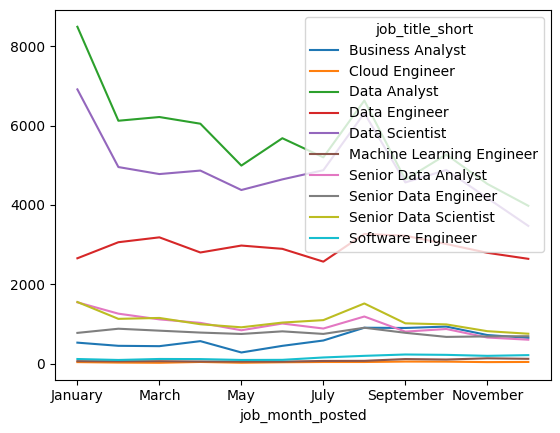

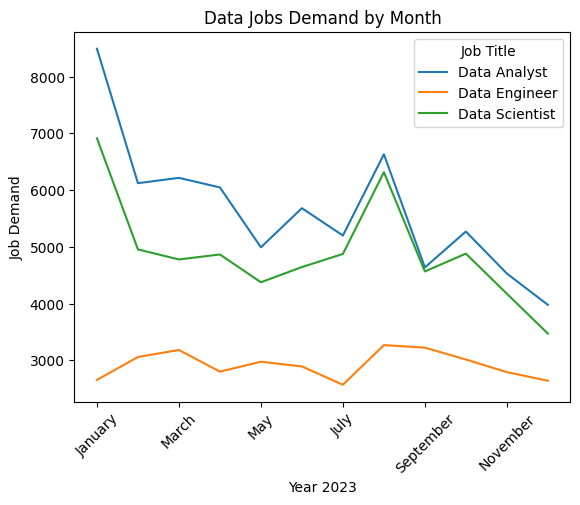

In [69]:
df_usa_month_pivot.reset_index(inplace=True) # We start by creating an index of numbers to attach the months to.
df_usa_month_pivot['month_no'] = pd.to_datetime(df_usa_month_pivot['job_month_posted'], format='%B').dt.month  # creating a column aligning the month names with month numbers
df_usa_month_pivot.sort_values('month_no', inplace=True) # sorting the month numbers, and thereby names in chronological order
df_usa_month_pivot.set_index('job_month_posted', inplace=True) # and then setting the month numbers, month_no as the index.
df_usa_month_pivot.drop(columns='month_no', inplace=True)
# df_usa_month_pivot.drop(columns=['level_0', 'index', inplace=True]) used to drop recurring columns specified in list, columns
df_usa_month_pivot # now we have our final table cleaned up for plotting
df_usa_month_pivot.plot(kind='line') # here we have our line chart, although overwhelming with multiple lines one one chart, we can simply narrow down to the 3 data facing jobs specific to what I need

data_jobs = ['Data Analyst', 'Data Engineer', 'Data Scientist']

Data_job_month_demand = df_usa_month_pivot[data_jobs]
Data_job_month_demand.plot(kind='line')
plt.title("Data Jobs Demand by Month")
plt.ylabel('Job Demand')
plt.xlabel('Year 2023')
plt.xticks(rotation = 45)
plt.legend(title='Job Title')
plt.show()
